In [127]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def days(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [128]:
rundf = pd.read_csv('results/'+
                    'SIsaR_0.9.4.2 experiments 2 seeds-table_1000_basic_control_schoolOnSept.csv',
                    sep=',',skiprows=6)
case="# 1000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep"
md(case)

# 1000 epidemics with non-pharmaceutical containment measures, schools open in Sep

In [129]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [4]:
rundf.columns

Index(['[run number]', '[step]', 'seed0', 'seed', 'cp1cRed', 'cp1cRedNH',
       'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed', 'cp2cRedNH',
       'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed', 'cp3cRedNH',
       'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed', 'cp4cRedNH',
       'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cumulativeRedCount',
       'cumulativeVioletCount', 'cumulativeDeadCount', 'ticks', 'TinfSch',
       'SinfSch', 'TinfNotSch', 'SinfNotSch', 'totalInfected',
       'totalInfected&Deceased'],
      dtype='object')

In [130]:
rundf.replace(-1, np.nan, inplace=True)

In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,946.00,1000.00,1000.00,1000.00
mean,4.24,153.71,409.73,199.35
std,7.29,168.55,454.12,129.00
min,0.00,0.00,2.00,13.00
25%,0.00,9.00,18.75,95.00
50%,0.00,81.50,231.50,154.00
75%,6.00,269.50,770.00,309.25
max,42.00,738.00,1907.00,617.00


In [7]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [8]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     946.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       4.24 &              153.71 &                  409.73 &  199.35 \\
std   &       7.29 &              168.55 &                  454.12 &  129.00 \\
min   &       0.00 &                0.00 &                    2.00 &   13.00 \\
25\%   &       0.00 &                9.00 &                   18.75 &   95.00 \\
50\%   &       0.00 &               81.50 &                  231.50 &  154.00 \\
75\%   &       6.00 &              269.50 &                  770.00 &  309.25 \\
max   &      42.00 &              738.00 &                 1907.00 &  617.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

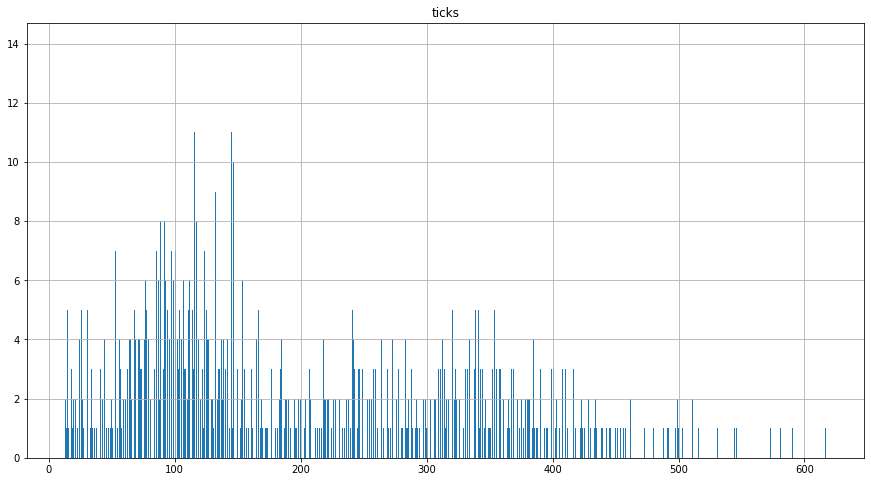

In [9]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

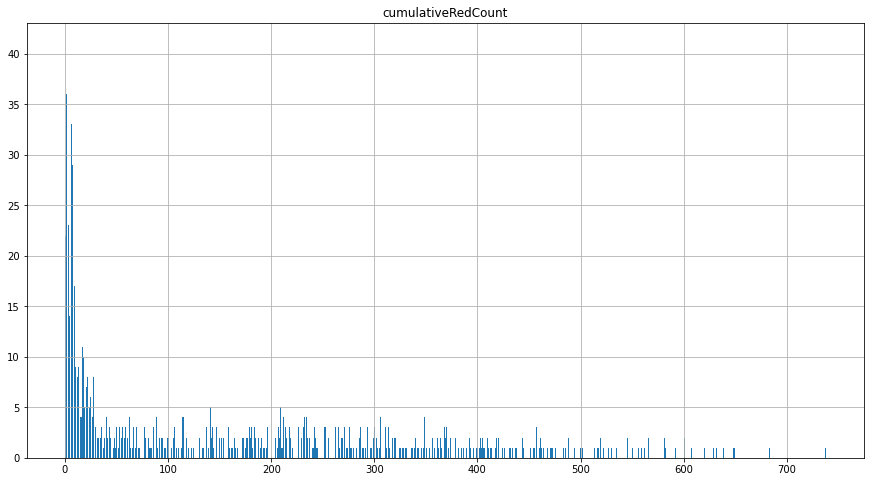

In [10]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

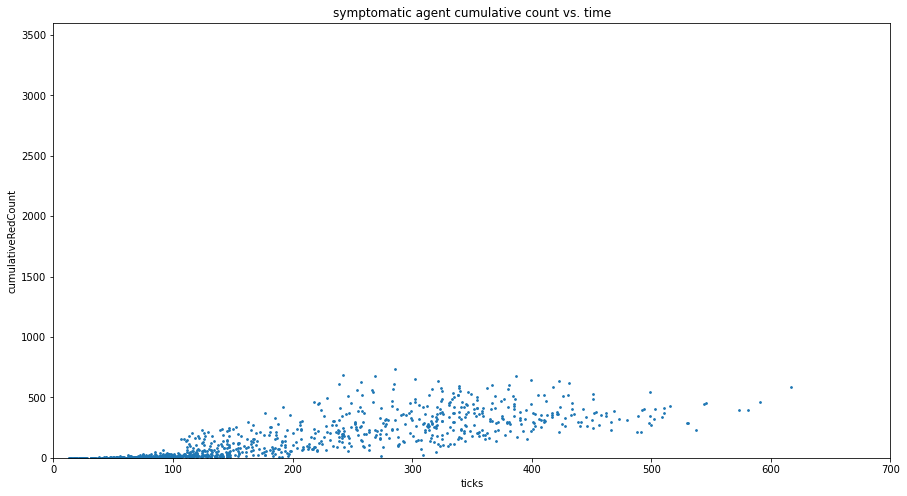

In [11]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

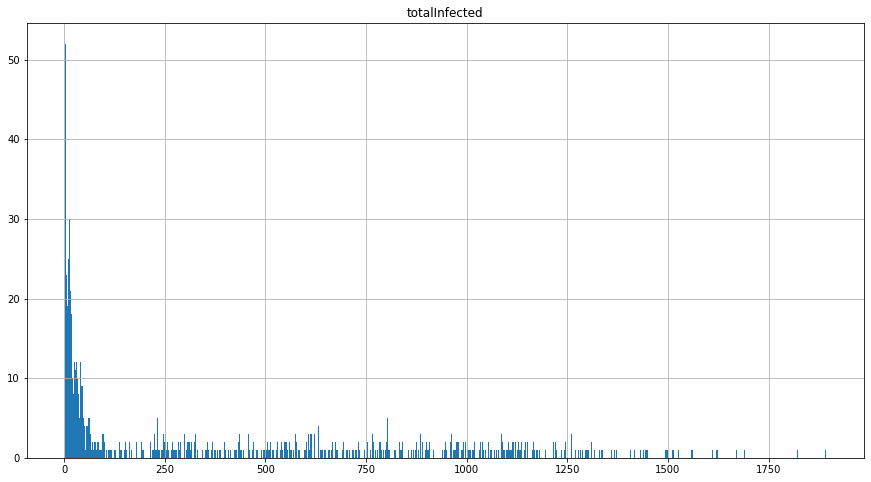

In [12]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

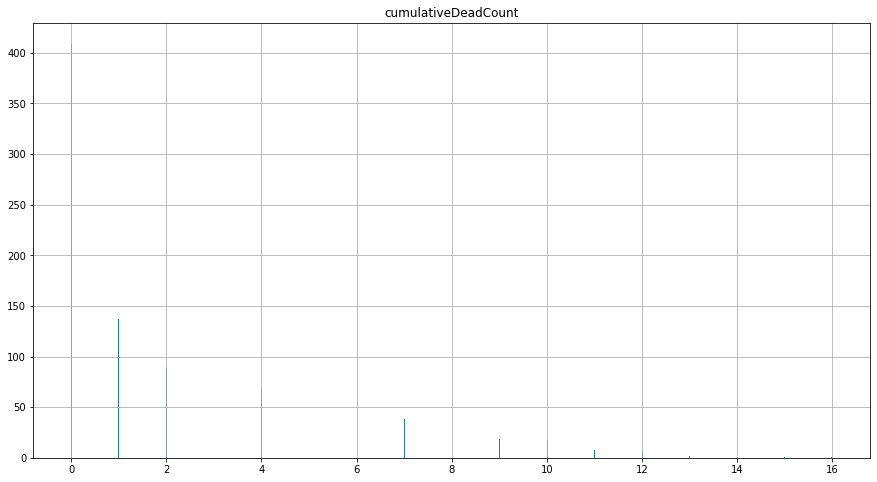

In [13]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

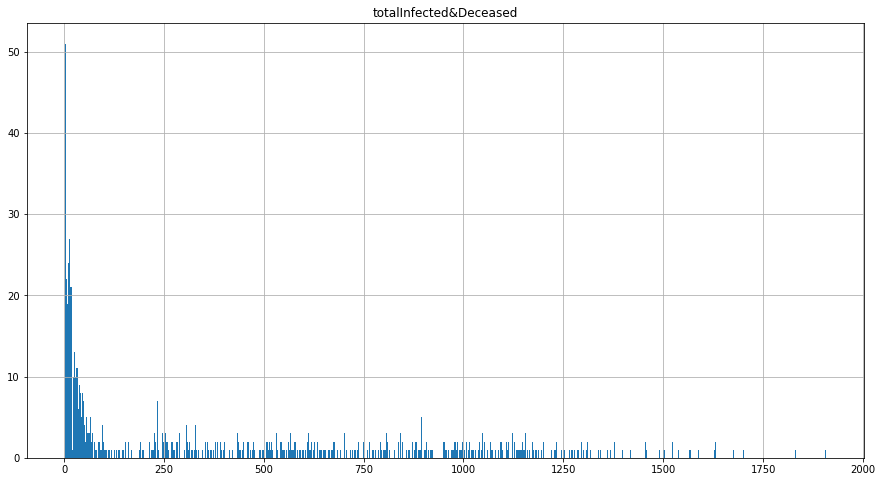

In [14]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

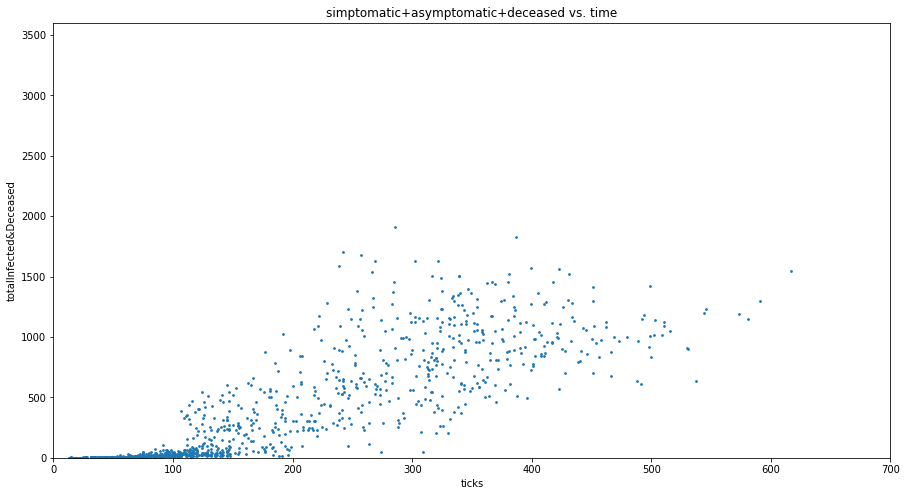

In [15]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

In [71]:
md("# --------------------------------------------------------\n"+\
    "# Time Function displaying heat-maps\n"+\
  "# --------------------------------------------------------")

# --------------------------------------------------------
# Time Function displaying heat-maps
# --------------------------------------------------------

In [147]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(day0,day1,title):
    
    rundfHere=rundf[rundf.ticks>=day0]
    rundfHere=rundfHere[rundfHere.ticks<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,days(day0).strftime("%Y-%m-%d"),\
                           day1,days(day1).strftime("%Y-%m-%d"))) )
    tmp=rundfHere[['cumulativeRedCount','totalInfected&Deceased','ticks']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), bins {}"\
                   .format(day0,days(day0).strftime("%Y-%m-%d"),\
                           day1,days(day1).strftime("%Y-%m-%d"),nBins)) )
    
        # symptomatic + asymptomatic + deceases
        histLog = plt.hist2d(x=rundfHere['ticks'], y=rundfHere['totalInfected&Deceased'], 
                             bins=nBins,
                             range=[[0, 700], [0, 3600]],norm=LogNorm()) 
        plt.show()

        
        
        """
    display(md ("# date threshold after {}  days = {}, bins {}"\
               .format(nDays,days(nDays).strftime("%Y-%m-%d"),nBins)) )
    display(
    histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=2*nBins,
                  range=[[0, 700], [0, 3600]],norm=LogNorm()) )
    plt.show()
    """

## Epidemics with duration between 100 days (2020-05-13) and 300 days (2020-11-29)

,cumulativeRedCount,totalInfected&Deceased,ticks
count,459.00,459.00,459.00
mean,133.98,340.82,176.81
std,137.66,360.89,59.75
min,2.00,6.00,100.00
25%,23.00,44.50,124.00
50%,89.00,236.00,158.00
75%,207.00,532.00,231.00
max,738.00,1907.00,300.00


\begin{tabular}{lrrr}
\toprule
{} &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &              459.00 &                  459.00 & 459.00 \\
mean  &              133.98 &                  340.82 & 176.81 \\
std   &              137.66 &                  360.89 &  59.75 \\
min   &                2.00 &                    6.00 & 100.00 \\
25\%   &               23.00 &                   44.50 & 124.00 \\
50\%   &               89.00 &                  236.00 & 158.00 \\
75\%   &              207.00 &                  532.00 & 231.00 \\
max   &              738.00 &                 1907.00 & 300.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 100 days (2020-05-13) and 300 days (2020-11-29), bins 10

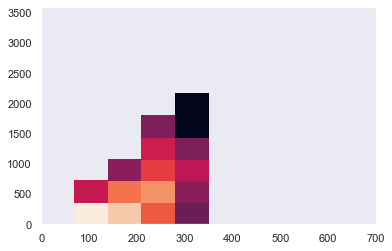

## Epidemics with duration between 100 days (2020-05-13) and 300 days (2020-11-29), bins 20

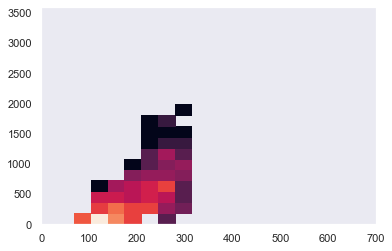

## Epidemics with duration between 100 days (2020-05-13) and 300 days (2020-11-29), bins 30

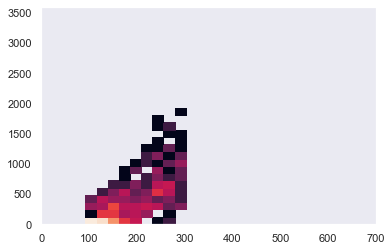

## Epidemics with duration between 100 days (2020-05-13) and 300 days (2020-11-29), bins 60

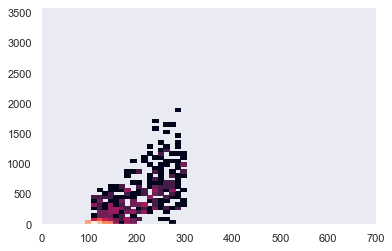

In [149]:
timeFunction(100,300,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

# Heatmaps

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

#import numpy as np
import seaborn as sns; sns.set()

### bins = 10

### symptomatic + asymptomatic + deceases

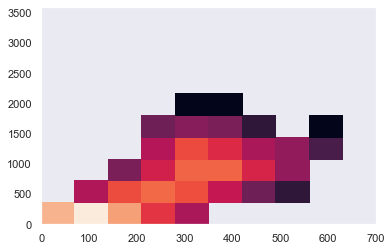

In [17]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [18]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

In [19]:
z10=np.amax(hist[0]) # max level z axis
z10

306.0

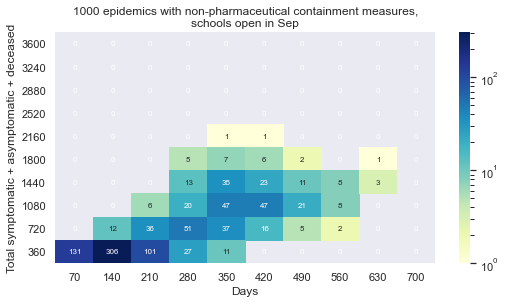

In [20]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

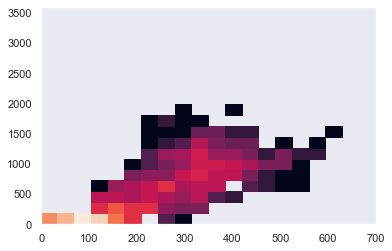

In [21]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [22]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

In [23]:
z20=np.amax(hist[0]) # max level z axis
z20

168.0

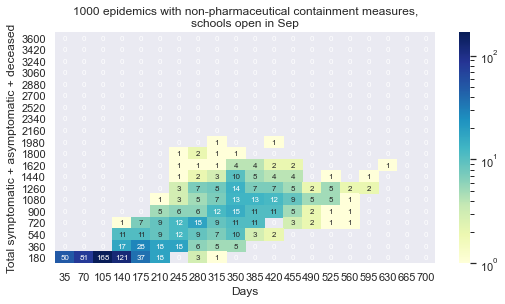

In [24]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

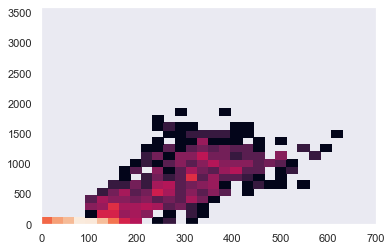

In [25]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [26]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

In [27]:
z30=np.amax(hist[0]) # max level z axis
z30

111.0

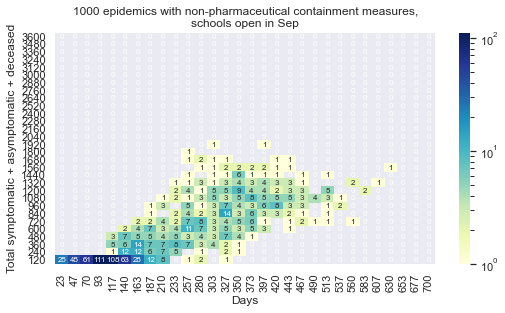

In [28]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

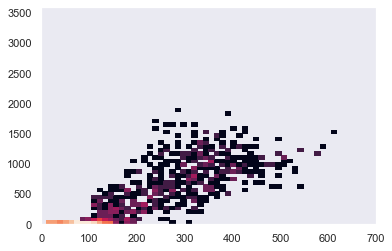

In [29]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [30]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

In [31]:
z60=np.amax(hist[0]) # max level z axis
z60

55.0

In [32]:
#firstRow
np.transpose(hist[0])[0]

array([ 0., 25., 25., 20., 26., 35., 55., 53., 53., 44., 28., 17., 16.,
        4.,  1.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

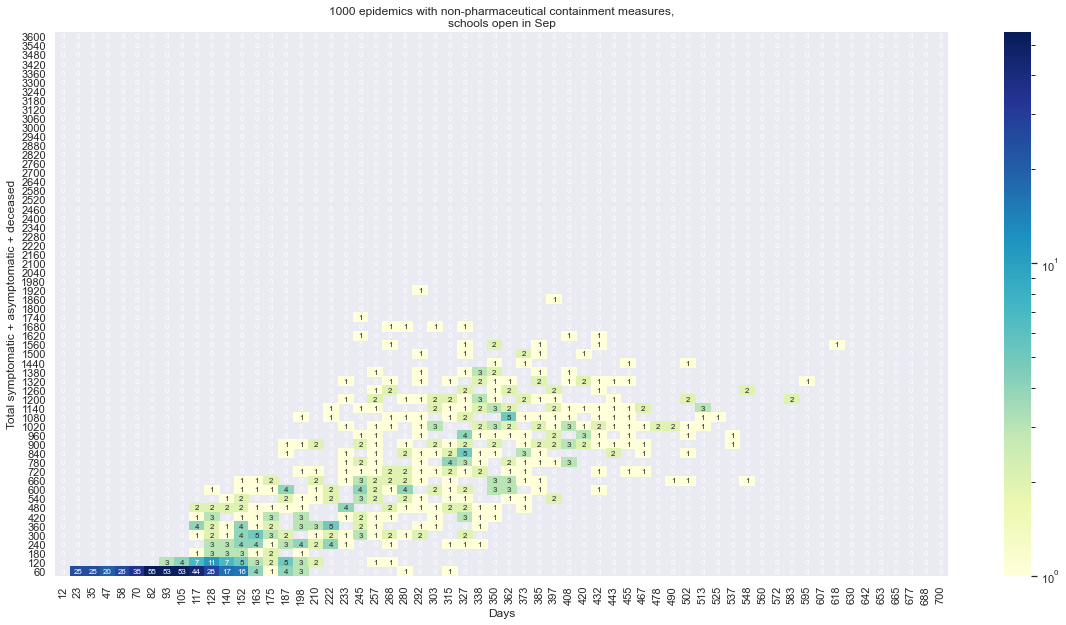

In [33]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

# Epidemics concluded before Sep 14

In [34]:
rundfBefore=rundf[rundf.ticks<=225]
rundfBefore.shape[0] # rows

614

In [35]:
rundfBefore[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,560.00,614.00,614.00,614.00
mean,3.27,48.61,114.71,109.80
std,6.40,75.51,186.93,50.90
min,0.00,0.00,2.00,13.00
25%,0.00,5.00,11.00,75.00
50%,0.00,14.00,28.50,106.00
75%,3.00,59.00,118.50,142.00
max,36.00,460.00,1174.00,225.00


In [36]:
tmp=rundfBefore[['cumulativeRedCount','totalInfected&Deceased','ticks']].describe();

In [37]:
print (tmp.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &              614.00 &                  614.00 & 614.00 \\
mean  &               48.61 &                  114.71 & 109.80 \\
std   &               75.51 &                  186.93 &  50.90 \\
min   &                0.00 &                    2.00 &  13.00 \\
25\%   &                5.00 &                   11.00 &  75.00 \\
50\%   &               14.00 &                   28.50 & 106.00 \\
75\%   &               59.00 &                  118.50 & 142.00 \\
max   &              460.00 &                 1174.00 & 225.00 \\
\bottomrule
\end{tabular}



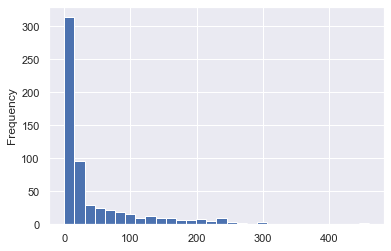

In [38]:
rundfBefore['cumulativeRedCount'].plot.hist(bins=30);

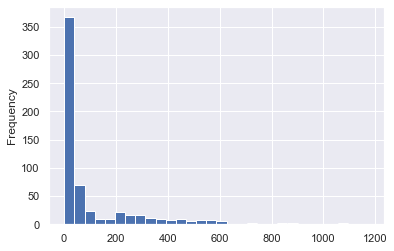

In [39]:
rundfBefore['totalInfected&Deceased'].plot.hist(bins=30);

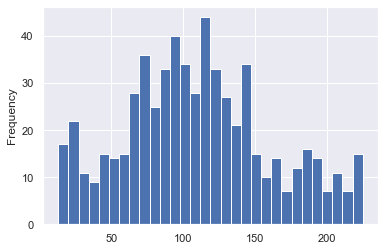

In [40]:
rundfBefore['ticks'].plot.hist(bins=30);

# Epidemics still active after Sep 14

In [41]:
#area_data=regional_data[regional_data.denominazione_regione==area]
rundf.shape[0] # rows

1000

In [42]:
rundf.ticks.describe() # ticks measures 

count   1000.00
mean     199.35
std      129.00
min       13.00
25%       95.00
50%      154.00
75%      309.25
max      617.00
Name: ticks, dtype: float64

In [43]:
# at 225 we are at Sep 14, opening day of schools
rundf=rundf[rundf.ticks>225]

In [44]:
rundf.shape[0] # rows

386

In [45]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,386.00,386.00,386.00,386.00
mean,5.63,320.89,879.00,341.80
std,8.23,137.85,346.26,76.96
min,0.00,19.00,48.00,226.00
25%,0.00,219.25,619.25,283.00
50%,1.00,308.50,887.00,332.50
75%,10.00,406.75,1123.75,385.00
max,42.00,738.00,1907.00,617.00


In [46]:
tmp=rundf[['cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [47]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &     386.00 &              386.00 &                  386.00 & 386.00 \\
mean  &       5.63 &              320.89 &                  879.00 & 341.80 \\
std   &       8.23 &              137.85 &                  346.26 &  76.96 \\
min   &       0.00 &               19.00 &                   48.00 & 226.00 \\
25\%   &       0.00 &              219.25 &                  619.25 & 283.00 \\
50\%   &       1.00 &              308.50 &                  887.00 & 332.50 \\
75\%   &      10.00 &              406.75 &                 1123.75 & 385.00 \\
max   &      42.00 &              738.00 &                 1907.00 & 617.00 \\
\bottomrule
\end{tabular}



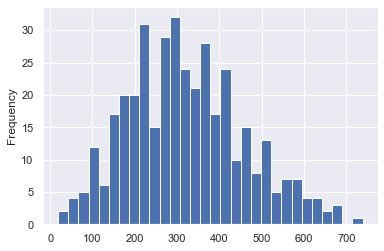

In [48]:
rundf['cumulativeRedCount'].plot.hist(bins=30);

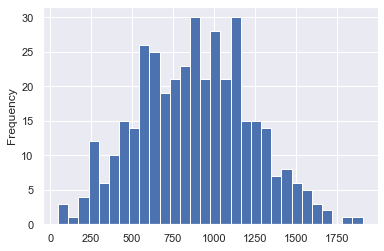

In [49]:
rundf['totalInfected&Deceased'].plot.hist(bins=30);

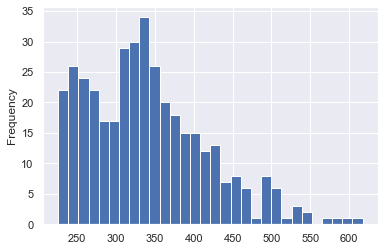

In [50]:
rundf['ticks'].plot.hist(bins=30);

### bins = 10

### symptomatic + asymptomatic + deceases

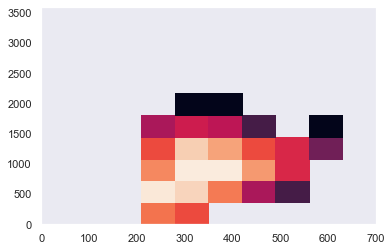

In [51]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [52]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

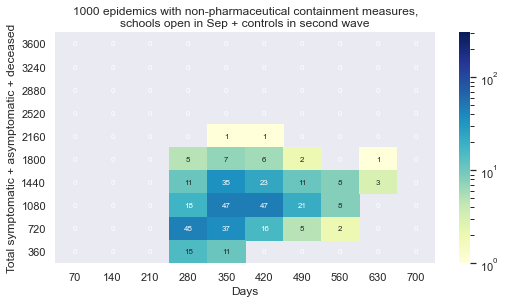

In [53]:
lognorm = LogNorm(vmin=1.0, vmax=z10)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

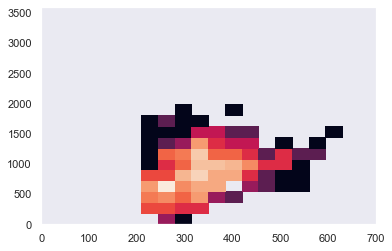

In [54]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [55]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

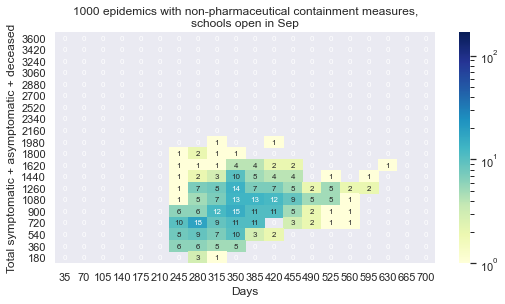

In [56]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

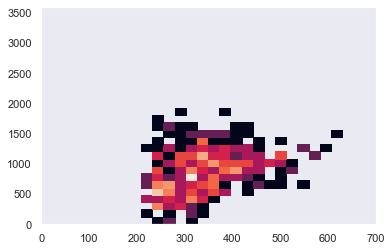

In [57]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [58]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

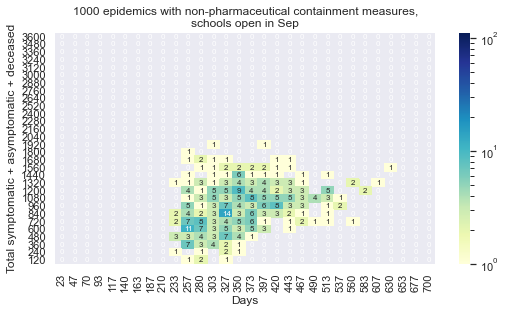

In [59]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

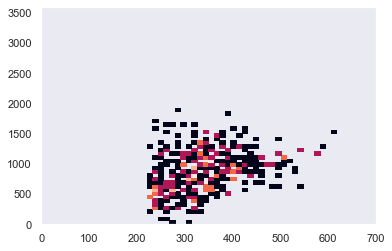

In [60]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [61]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

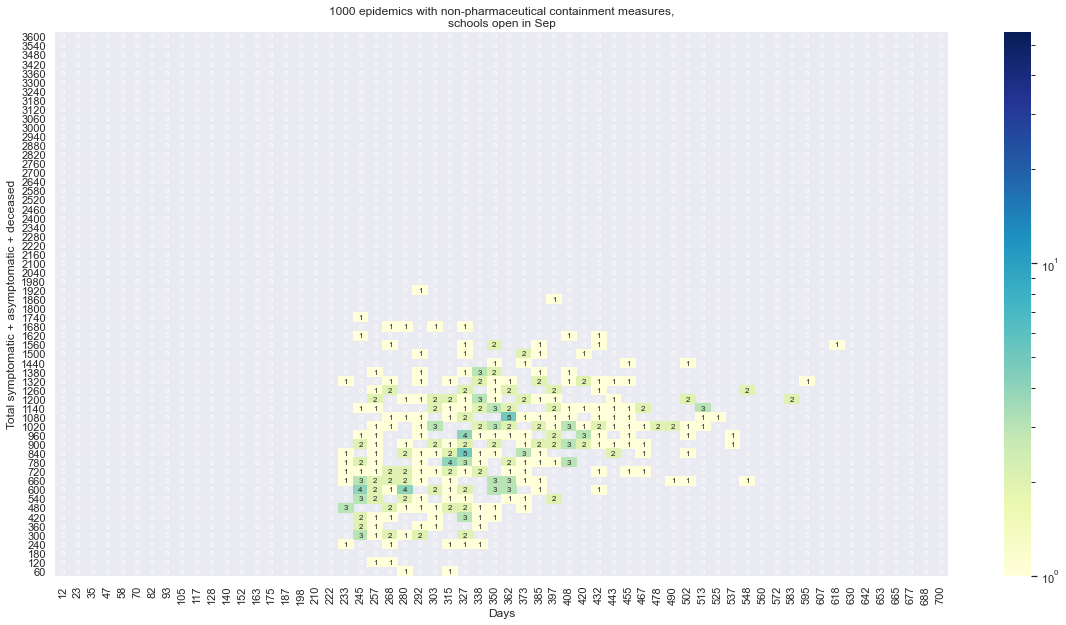

In [62]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

plt.show()